In [1]:
from processing.pipelines import pipeline_modes_vs_formfactor_parity, pipeline_modes_vs_formfactor_m, pipeline_modes_vs_formfactor_char



path_p = 'data_rep/Cyl_axis_oriented/parity'
path_m = 'data_rep/Cyl_axis_oriented/ms'

df_p = pipeline_modes_vs_formfactor_parity(path=path_p)
df_m = pipeline_modes_vs_formfactor_m(path=path_m)

df = df_m.join(df_p, rsuffix='_p')

df = df.drop(columns=[df.columns[0] + "_p", df.columns[1] + "_p"])
df

While hendling complex numbers exception Can only use .str accessor with string values! of the type <class 'AttributeError'> occured
While hendling complex numbers exception 'NoneType' object is not subscriptable of the type <class 'TypeError'> occured
While hendling complex numbers exception Can only use .str accessor with string values! of the type <class 'AttributeError'> occured
While hendling complex numbers exception Can only use .str accessor with string values! of the type <class 'AttributeError'> occured
/home/aluatar/.local/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
While hendling complex numbers exception Can only use .str accessor with string values! of the type <class 'AttributeError'> occured
While hendling complex numbers exception 'NoneType' object is not subscriptable of the type <class 'TypeError'> occured
While hendling complex numbers 

,param_0,ef_1,m,p
0,1.0,22.824020,1.0,1.0
1,1.0,27.096709,1.0,-1.0
2,1.0,29.996440,0.0,1.0
3,1.0,30.086080,2.0,1.0
4,1.0,34.473022,0.0,-1.0
...,...,...,...,...
2836,14.0,22.347284,1.0,-1.0
2837,14.0,22.416080,2.0,-1.0
2838,14.0,22.426311,0.0,-1.0
2839,14.0,22.460414,0.0,-1.0


In [2]:
all(df.loc[:,'param_0':'ef_1'] == df_m.loc[:,'param_0':'ef_1']), all(df.loc[:,'param_0':'ef_1'] == df_p.loc[:,'param_0':'ef_1'])

(True, True)

In [86]:
df.loc[df['param_0'] == 4.2]

,param_0,ef_1,m
160,4.2,22.311363,1.0
161,4.2,22.635424,1.0
162,4.2,23.034241,1.0
163,4.2,23.144863,0.0
164,4.2,23.190271,2.0


In [38]:
df.loc[496, 'p'] = 1.0

/tmp/ipykernel_79897/1280180192.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


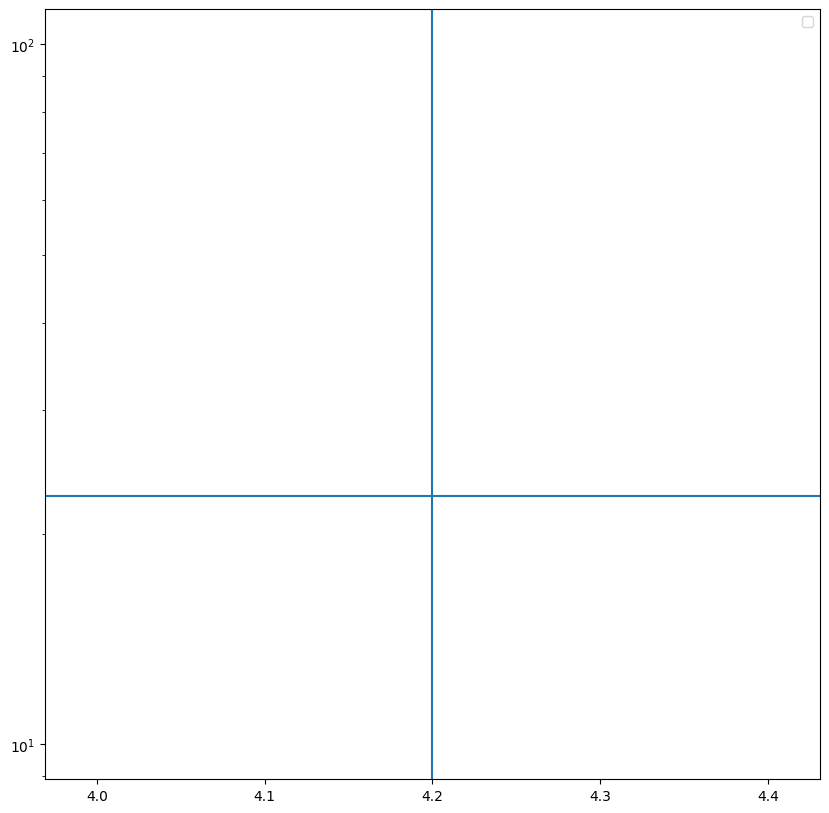

In [4]:
import matplotlib.pyplot as plt
_df = df.loc[df['m']==1].loc[df['m']==-1]
fig = plt.figure(figsize=(10,10), dpi=100)
ax = fig.add_subplot(111)

ax.scatter(_df['param_0'], _df['ef_1'], c=_df['m'])
ax.set_yscale('log')
plt.legend()
ax.axvline(4.2)
ax.axhline(22.635424)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


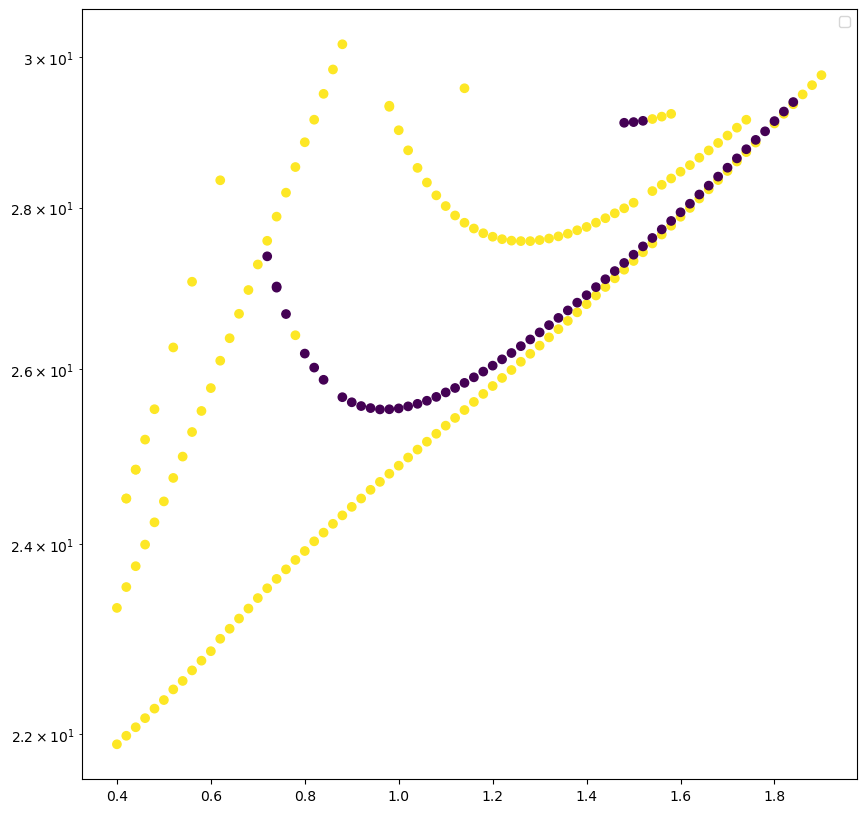

In [18]:
import matplotlib.pyplot as plt
_df = df.loc[df['m']==2]#.loc[df['p']==-1]
fig = plt.figure(figsize=(10,10), dpi=100)
ax = fig.add_subplot(111)

ax.scatter(_df['param_0'], _df['ef_1'], c=_df['p'])
ax.set_yscale('log')
plt.legend()

In [93]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 


scaler = StandardScaler() 
_df = df.copy(deep=True)

_df['param_1'] = np.log(_df['param_1'])
#_df['param_0'] = np.exp(_df['param_0'])
#_df['ef_2'] = np.log(_df['ef_2'])
X_scaled = scaler.fit_transform(df) 
  
# Normalizing the Data 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
#  
#X_principal = X_normalized
X_principal


,P1,P2
0,-0.595156,0.851358
1,-0.115928,1.047885
2,-0.039432,0.958843
3,0.278492,0.976451
4,0.927175,0.431297
...,...,...
105,-0.208887,-0.878481
106,-0.376491,-0.813744
107,-0.350775,-0.828370
108,-0.599290,-0.588117


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


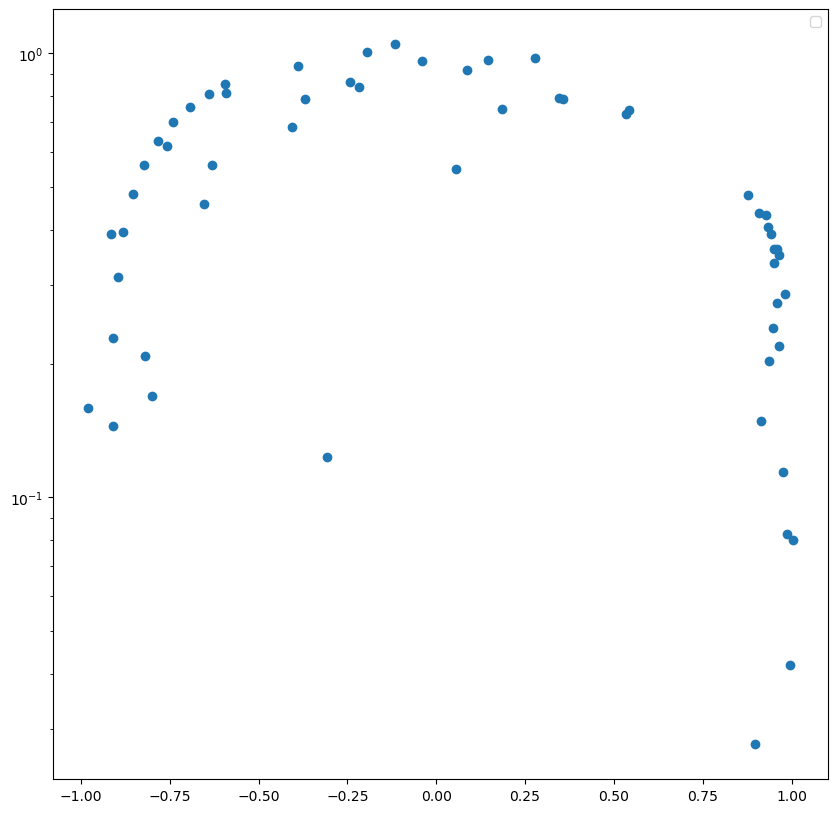

In [94]:
fig = plt.figure(figsize=(10,10), dpi=100)
ax = fig.add_subplot(111)

ax.scatter(X_principal['P1'], X_principal['P2'])
ax.set_yscale('log')
plt.legend()

In [95]:
spectral_model_rbf = SpectralClustering(n_clusters = len(df.loc[df['param_0']==1]), affinity ='nearest_neighbors', n_neighbors=10) 
  
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(X_principal) 

In [96]:
df['labels'] = labels_rbf
_df = df.loc[df['labels']==0]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


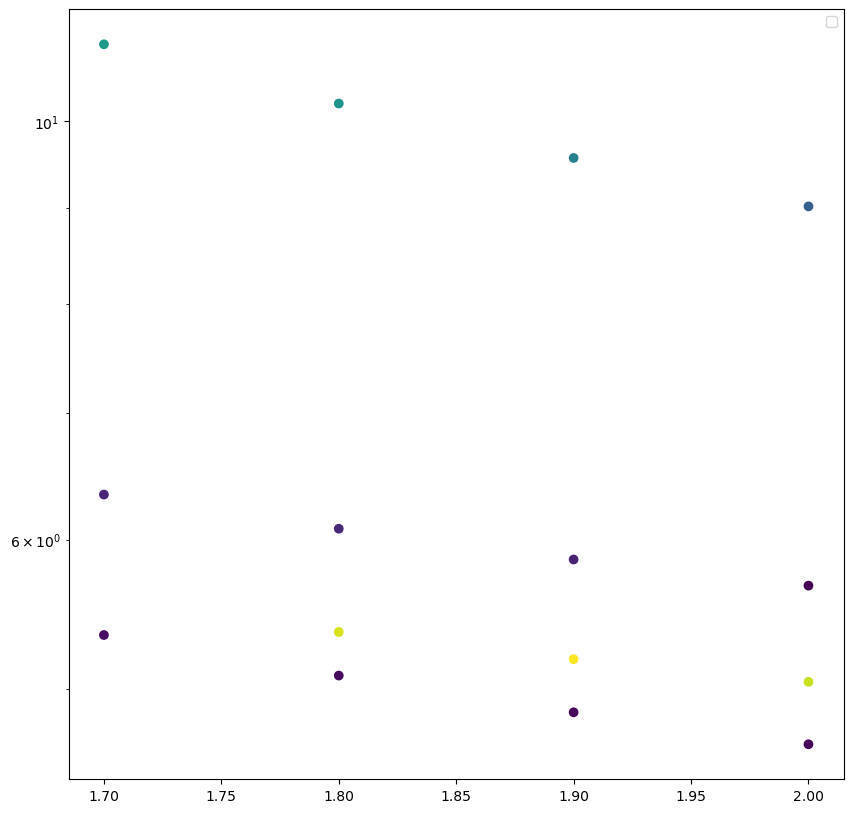

In [97]:
fig = plt.figure(figsize=(10,10), dpi=100)
ax = fig.add_subplot(111)

ax.scatter(_df['param_0'], _df['param_1'], c=_df['ef_2'])
ax.set_yscale('log')
plt.legend()

In [6]:
from processing.pipelines import pipeline_modes_vs_h

df1 = pipeline_modes_vs_h('data_rep/h_vs_mode/m.csv')

df1

While hendling complex numbers exception Can only use .str accessor with string values! of the type <class 'AttributeError'> occured
While hendling complex numbers exception 'NoneType' object is not subscriptable of the type <class 'TypeError'> occured
While hendling complex numbers exception Can only use .str accessor with string values! of the type <class 'AttributeError'> occured
While hendling complex numbers exception Can only use .str accessor with string values! of the type <class 'AttributeError'> occured
While hendling complex numbers exception Can only use .str accessor with string values! of the type <class 'AttributeError'> occured
While hendling complex numbers exception Can only use .str accessor with string values! of the type <class 'AttributeError'> occured
While hendling complex numbers exception Can only use .str accessor with string values! of the type <class 'AttributeError'> occured
While hendling complex numbers exception Can only use .str accessor with string va

{0.0: {'freq': array([0.03234229, 0.03325238, 0.03349142, 0.03262846, 0.03325426,
         0.03374282, 0.03277901, 0.03325527, 0.0338727 , 0.03287191,
         0.03325591, 0.03395207, 0.03293495, 0.03325634, 0.03400563,
         0.03298055, 0.03325666, 0.03404418, 0.03301505, 0.03325691,
         0.0340733 , 0.03304208, 0.0332571 , 0.03409604, 0.03306382,
         0.03325725, 0.03411429, 0.03308169, 0.03325738, 0.03412924,
         0.03309663, 0.03325749, 0.03414176, 0.03310932, 0.03325758,
         0.03415241, 0.03312022, 0.03325766, 0.03416153, 0.03312969,
         0.03325773, 0.03416943, 0.03313799, 0.03325779, 0.03417638,
         0.03314533, 0.03325784, 0.03418251, 0.03315186, 0.03325789,
         0.03418797, 0.03315772, 0.03325793, 0.03419288, 0.03316299,
         0.03419722]),
  'h': array([0.28420526, 0.28420526, 0.28420526, 0.42630788, 0.42630788,
         0.42630788, 0.56841051, 0.56841051, 0.56841051, 0.71051314,
         0.71051314, 0.71051314, 0.85261577, 0.85261577, 0.852